# Advanced Data Analysis - Assignment 2

This notebook contains the **Assignment 2** of the Advanced Data Analysis course.

The topic of the assignment consists in applying regression on National Health and Nutrition Examination data.

The assignment is **individual**.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        


# Dataset

The file children.csv contains a file with two columns. The first column is the age of each child in
months, and the second the weight in Kg. The data is from the National Health and Nutrition Examination
Survey of 2017-2018 and represents a sample of children up to 24 months old.

The following code loads the children.csv file 

In [1]:
# This code cell does not need to be changed
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

dataFileName = os.path.join( "assignment2", "children.csv")
dataDF = pd.read_csv(dataFileName)
dataDF.head()





,age,weight
0,11.0,10.2
1,21.0,10.6
2,7.0,9.3
3,19.0,8.3
4,16.0,9.2


# Assignment

In this assignment, we aim to predict the weight of a children until 24 monthts old based on child age. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
import sklearn
from importlib import reload
plt= reload(plt)

x = dataDF[['age']]
y = dataDF[['weight']]




## Question 1

In this question, we aim to create a linear regression model do predict the weight of a children based on his/her age. 

### **1.a)** Let's start by plotting the data in a scatter plot.  Is there any correlation between the weight and age of children? (complement visualization with a statistic information). In your opinion, is it reasonable to create a linear regression model to predict the weight of a children? (3 points out of 20). 


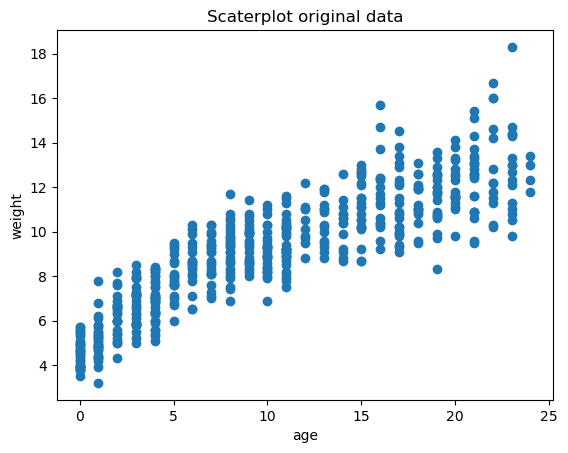

,age,weight
age,1.000000,0.879615
weight,0.879615,1.000000


In [3]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on your solution.
# Plot oroginal data
x_feature = dataDF[["age"]]
y_labels = dataDF[["weight"]]
plt.scatter(x_feature, y_labels)
plt.xlabel("age")
plt.ylabel("weight")
plt.title("Scaterplot original data")
plt.show()

#Correlation
dataDF_corr = dataDF.corr()
display(dataDF_corr)






### Result:

Yes it is reasonable to calculate a linear regression model because age and weight have a very strong positive pearson correlation by each other. Which is confirmed by have a look on the data points.
Strong positive correlation is higher then 0.7 and in our example the correlation is 0.88.

If we dont have a correlation between the dependent and independent variable it doesnt make sense to calculate a linear regression. Without a correlation you can not predict values because of the missing relation between the variables.

A more advanced linear regression called polyminial regression can be meaningful because for a specific age the weight wont increase linear. The children are no longer gain as much weight as they did until the first 25 months

### **1.b)** Build a linear regression model and estimate the true error (5 out of 20) 

In [4]:
# Solve question here.

# Set a seed and split the data
seed = 31 # Using the same train and test data all time
train_set, test_set = train_test_split(dataDF, test_size = 0.2, random_state = seed)

# Build a linear regression model
model = linear_model.LinearRegression()

# Create the train variables
x_train = train_set[["age"]]
y_train = train_set[["weight"]]

# Create the test variables
x_test = test_set[["age"]]
y_test = test_set[["weight"]]

# Fit the model on train set
model_train = model.fit(x_train, y_train)
# Predict data points of the test set 
pred_test = model.predict(x_test)
# Calculate the true error
error_test = mean_squared_error(y_test, pred_test)
# Print
print("Test error (True error) = "+ str(error_test))

# Because a calculation of the error with just one seed is biased i am calculate a crossvalidation 
# which is calculating several combination of test and train data seeds with the whole dataset

crossvalidation_error = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=10).mean()
print("Unbiased true error with crossvalidation "+str(crossvalidation_error))




Test error (True error) = 1.6976792023771248
Unbiased true error with crossvalidation -1.6362454439449432


#### Steps

- 1. split the data set in train and test data.
- 2. Afterwards using the polynomial function to calcuate the train and test error of the linear regression model.
- 3. With setting a seed we can be save that we are using all the time the same split in train and test data sets

#### Train error and Test error
- The train error means the error by predicting the data points of our data set. More important is to test our model on unknown data points thats why we are testing the trained model on our test data set and simulate so a test to unknown data points.

- Thats why the true error as the mean squared error is in our case the test error with a value of 1.70.

#### True error in general
- In general the true error is the error model is performing on all data unknown data points of the world but we have just one data set thus I have to simualte this by splitting the data set in train set to train the model and test set to simulate a new data set and look how well our model is performing.

#### Crossvalidation

- The crossvalidation is used because the previous calculated error is a biased true error of the test set because it shows the error for one specific seed
- The seed defines that jsut specific datapoints for train and test data are used of the whole sample
- By using the crossvalidation the function split the dataset in different parts and uses different combination of datapoints of the whole sample for train and test set
- We are getting just a slightly lower error as previous calcuated by a seed of 31
- By using different seed it can be seen that the error will differ more

### **1.c)** Display in a visualization the data used to build the model as well as the model obtained. Finally,  write the equation of the model obtained (2 out of 20) 

Intercept_train =  [5.71758164]
Coefficient_train =  [[0.33326423]]


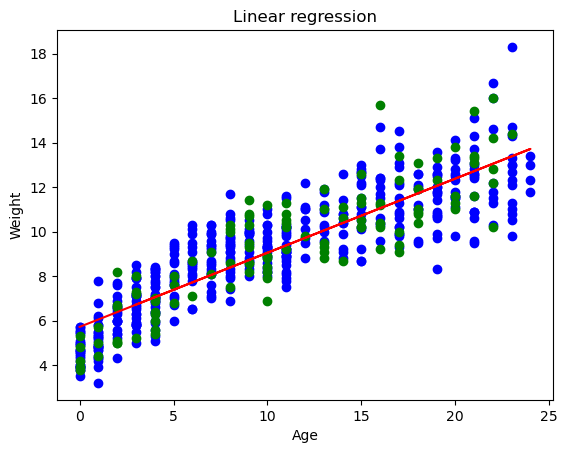

Equation: weight(age) = [5.71758164]+[[0.33326423]]*age


In [9]:
# Solve question here. 

# linear model with splitting in train and test set
from sklearn import linear_model

# Apply model train
pred_train = model_train.predict(x_train)

print ('Intercept_train = ',str(model_train.intercept_))
print ('Coefficient_train = ',str(model_train.coef_))

plt.scatter(x_train, y_train, color= "b")
plt.scatter(x_test,y_test, color = "g")
plt.plot(x_train,pred_train, color ="red")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.title("Linear regression")
plt.show()

print("Equation: weight(age) = "+ str(model_train.intercept_)+"+"+str(model_train.coef_)+"*age")




- Train data is blue and test data green

Linear Regression model equation in general:

y(x) =  $\theta$<sub>1</sub>x + $\theta$<sub>0</sub>

Theta 0 = Intercept

Theta 1 = Coefficient

Regression equation in our case is as followers:

y(x) = $5.7$<sub>0</sub> + $0.33$</sub>x

with y(x) is dependent variable in our case the weight 
x is independent variable and in our case the age

## Question 2 (10 points out of 20)

Here, we aim to find out if we can create a better model to predict the weigth of children based on their age.

### **2.a)** Evaluate polynomial model of degrees 1 through 10. What degree would you choose in order to have a better model when compared to the model built previously? Why? (6 out of 20)

In [6]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
# Crossvalidation

from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit

# Crossvalidation
def trans_data(degree):
    polynomial_features = PolynomialFeatures(degree)
    
    # Transform the original input data
    poly_trans = polynomial_features.fit_transform(x) # x is our initial variable that has all inputs
    input_df = pd.DataFrame(poly_trans)
    return input_df


model = linear_model.LinearRegression()

df = pd.DataFrame({'degree' : range(1, 11 ,1)})

df['test_error'] = df['degree'].apply(lambda x: cross_val_score(model, trans_data(x), y,
                                                                scoring='neg_mean_squared_error', cv=10).mean())
df1 = df.sort_values('test_error', ascending=False)
display(df1)




,degree,test_error
9,10,-1.400844
7,8,-1.407285
2,3,-1.409529
3,4,-1.412721
8,9,-1.413343
6,7,-1.417251
4,5,-1.419276
5,6,-1.421643
1,2,-1.443860
0,1,-1.636245


### Find the best degree

Easiest and best way is to use the crossvalidation. The crossvalidation is doing k times iterations over the whole dataset with different datapoints for train and test set called several seeds are used.
Crossvalidation is searching for the the degree with the lowest error and the value close to zero by trying out a lot of seeds and different combinations what we cannot do manually in the time. The error is a mean over the 10 iteration which is done for the specific degree.

- The key configuration parameter for k-fold cross-validation is k which defines the number of folds in which the whole given dataset is splitted
- Values of k=5, and k=10 are common used as the key 
- k= 10 is by far the most popular value used in applied machine learning to evaluate models
- k=10 was found to provide good trade-off of low computational cost and low bias in an estimate of model performance in several studies

#### In our case:

In our exapmle you can see for k <10 we are getting numbers more far away from zero and thus higher errors. 
- For e.g. k= 20 we are getting just -1.38 so slightly better results
- For e.g k = 500 we are getting -1.35 of test error
- But everytim we are getting the degree of 10 as best result for the degree of our polynmoial regression.

But keep attention of overfitting the model of the exisiting data points. If the model predict the data points of our data set 100% it is overfitted and can give really bad results to unknown new data sets.

### Result
In our case the degree 10 has a true error of 1.4 which is the lowest error close to zero and thats why it seems to be the best degree. 

It has to be considered that degree 10 can be already overfitted and maybe the second degree which is close to zero is the better option by using the model for new unkown datapoints. Thats can be tested if we are getting new datapoints and we can further improve our model.

The errors in the table above is negativ calculated in the crossvalidation because of the used strategy of the function called "neg_mean_squared_error".

### **2.b)** Using the best polynomial degree, find the coefficients of the best curve (2 points out of 20)

In [7]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
# Best degree is 10 as estimated in the task above by using the cross validation

from sklearn import linear_model

# Set polynomial features and build the dataframe
polynomial_features = PolynomialFeatures(10)
poly_trans = polynomial_features.fit_transform(x)

#Fit the model with train data
model = linear_model.LinearRegression()
model_fit = model.fit(poly_trans, y)

#Print intercept
print("Intercept of the model= " +str(model_fit.intercept_))
print("Coefficients of the model= " +str(model_fit.coef_))




Intercept of the model= [4.56150485]
Coefficients of the model= [[ 0.00000000e+00  7.67341781e-06  1.19904993e+00 -7.28488316e-01
   2.18010587e-01 -3.69413278e-02  3.75103256e-03 -2.32389037e-04
   8.59801068e-06 -1.74447121e-07  1.49276712e-09]]


### Intercept and coefficients of the best curve of degree 10

#### The best intercept:
- x0 = 4.56150485

#### The best coefficients are as follows: 
- x1 = 7.67341781e-06
- x2 = 1.19904993e+00 
- x3 = -7.28488316e-01
- x4 = 2.18010587e-01 
- x5 = -3.69413278e-02 
- x6 = 3.75103256e-03 
- x7 = -2.32389037e-04
- x8 = 8.59801068e-06 
- x9 = -1.74447121e-07  
- x10 = 1.49276712e-09

- The zero at the beginnning is the coefficients for x0.
- The polynomial x0 is equal to 1. Thus the coefficent has to be zero that the coeffcient x0 is not included tp build the model. 
- More important are x1 until x10 as meintioned above with coefficeints unequal to zero.

### **2.c)** Indicate what is the expected error of your model when predicting the weight of children from their age in months. Note that the error should be in Kg, so take careful note of the units you are computing (2 out of 20)

In [8]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
import math

# Calculate with crossvalidation error
crossvalidation_true_error = df1.iloc[0, df1.columns.get_loc("test_error")]
RMSE = math.sqrt(abs(crossvalidation_true_error))
print("Expected Error (RMSE- Root Mean squared error) of true error becasue our sample is example for the universe \n= "
      + str(RMSE)+ " kg")




Expected Error (RMSE- Root Mean squared error) of true error becasue our sample is example for the universe 
= 1.1835726334284682 kg


- Expecetd Error = True error of the universe. This refers to the test error.
- It is not possible to have access on all datapoints of the universe. 
- That is not possible thats why we are using our significant sample to calcuate the error. Thats sample is the symbol for our universe with all possible observations.
- In our case the expected error is 1.184 kg.
- Using the Root mean squared error --> Just sqrt of the MSE to get kg what is expected otherwise we have kg2

#### Result
- The expected weight of children predicted by the model will deviate of an average of 1.18 kg in relation to the actual value of the weight of children
